<a href="https://colab.research.google.com/github/Saaiheswar/TrafficSignClassification/blob/master/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load data and Visualise
with open('/tmp/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('/valid.p', mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/tmp/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train,y_train = train['features'],train['labels']
x_validation,y_validation = valid['features'],valid['labels']
x_test,y_test = test['features'],test['labels']

In [6]:
y_train.shape

(34799,)

In [4]:
x_train.shape

(34799, 32, 32, 3)

1

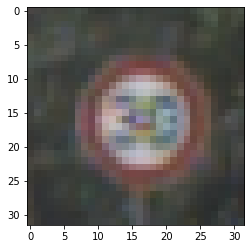

In [7]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

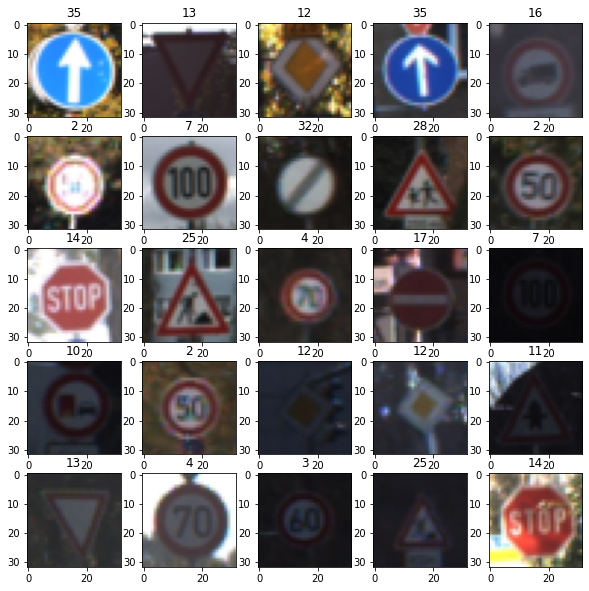

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):

    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])

        

In [14]:
#Normalise the data
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [18]:
x_train_grey = np.sum(x_train/3,axis=3,keepdims=True)
x_validation_grey = np.sum(x_validation/3,axis=3,keepdims=True)
x_test_grey = np.sum(x_test/3,axis=3,keepdims=True)

In [19]:
print(x_train_grey.shape,x_validation_grey.shape,x_test_grey.shape)

(34799, 32, 32, 1) (4410, 32, 32, 1) (12630, 32, 32, 1)


In [20]:
x_train_grey_norm = (x_train_grey - 128)/128
x_validation_grey_norm = (x_validation_grey - 128)/128
x_test_grey_norm = (x_test_grey - 128)/128

In [21]:
x_train_grey_norm

array([[[[-0.703125  ],
         [-0.70833333],
         [-0.71614583],
         ...,
         [-0.6640625 ],
         [-0.69791667],
         [-0.69791667]],

        [[-0.703125  ],
         [-0.71875   ],
         [-0.71875   ],
         ...,
         [-0.64322917],
         [-0.6953125 ],
         [-0.69270833]],

        [[-0.71354167],
         [-0.73177083],
         [-0.7109375 ],
         ...,
         [-0.6328125 ],
         [-0.68229167],
         [-0.6796875 ]],

        ...,

        [[-0.68229167],
         [-0.70572917],
         [-0.7265625 ],
         ...,
         [-0.58072917],
         [-0.63541667],
         [-0.671875  ]],

        [[-0.71354167],
         [-0.73177083],
         [-0.7578125 ],
         ...,
         [-0.5859375 ],
         [-0.6484375 ],
         [-0.68489583]],

        [[-0.73958333],
         [-0.75260417],
         [-0.7734375 ],
         ...,
         [-0.59895833],
         [-0.65625   ],
         [-0.71875   ]]],


       [[[-0.64322917],


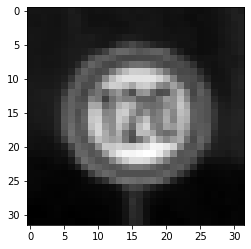

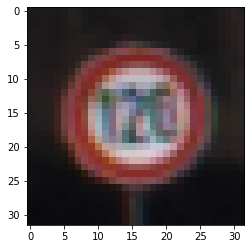

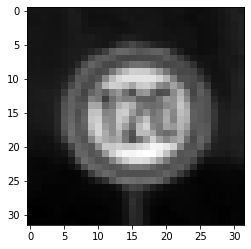

In [28]:
i = random.randint(1, len(x_train_grey))
plt.imshow(x_train_grey[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_grey_norm[i].squeeze(), cmap = 'gray')

In [36]:
#Build the Convolution Neural Network
from tensorflow.keras import datasets, layers, models
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, (3,3) ,activation ='relu',input_shape = (32,32,1)),
                                                    tf.keras.layers.MaxPool2D(2,2),
                                                     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                                    tf.keras.layers.MaxPooling2D(2,2),
                                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                                    tf.keras.layers.MaxPooling2D(2,2),
                                                    tf.keras.layers.Flatten(),
                                                    tf.keras.layers.Dropout(0.5),
                                                    tf.keras.layers.Dense(512, activation='relu'),
                                                    tf.keras.layers.Dense(43,activation='sigmoid')
])

model.summary()                          


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [53]:
#COMPILE AND TRAIN DEEP CNN MODEL
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [57]:
history = model.fit(x_train_grey_norm, y_train, batch_size=500, epochs = 5,validation_data=(x_validation_grey_norm, y_validation))

Epoch 1/5
70/70 [==============================] - 3s 45ms/step - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.1026 - val_accuracy: 0.9762
Epoch 2/5
70/70 [==============================] - 3s 40ms/step - loss: 0.0187 - accuracy: 0.9950 - val_loss: 0.0952 - val_accuracy: 0.9769
Epoch 3/5
70/70 [==============================] - 3s 40ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.0877 - val_accuracy: 0.9760
Epoch 4/5
70/70 [==============================] - 3s 40ms/step - loss: 0.0172 - accuracy: 0.9953 - val_loss: 0.0899 - val_accuracy: 0.9798
Epoch 5/5
70/70 [==============================] - 3s 40ms/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 0.0964 - val_accuracy: 0.9730


In [59]:
#Assess Trained CNN Model Performace
score = model.evaluate(x_test_grey_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 4ms/step - loss: 0.1632 - accuracy: 0.9629
Test Accuracy: 0.9629453420639038


In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [61]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

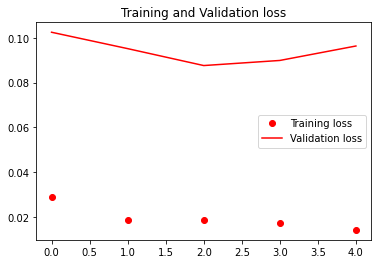

<Figure size 432x288 with 0 Axes>

In [66]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label="Training loss")
plt.plot(epochs,val_loss,'r',label = "Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

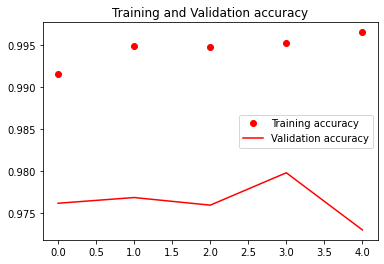

<Figure size 432x288 with 0 Axes>

In [67]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label="Training accuracy")
plt.plot(epochs,val_accuracy,'r',label = "Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

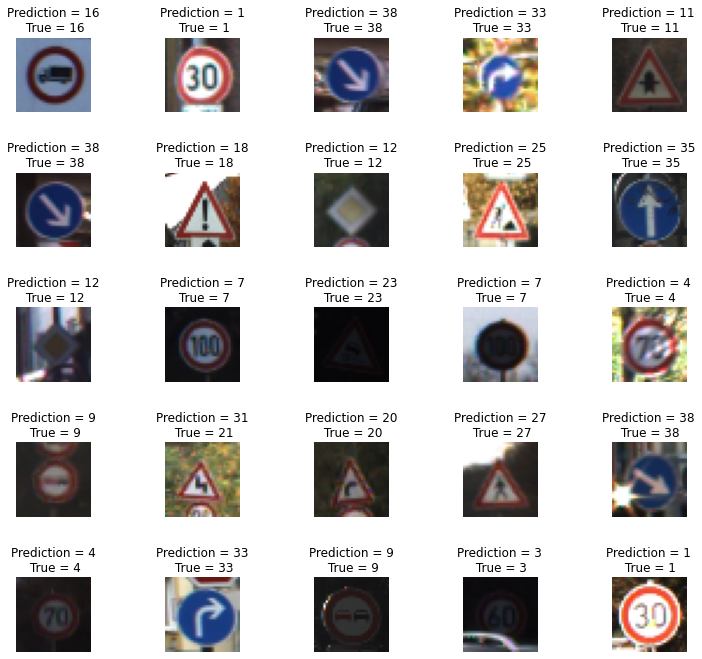

In [71]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }